In [2]:
!pwd

/data/vs1819/2layer_systems/2layer_system


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

In [5]:
dfpar = pd.read_csv("AI_backtracking_parameters.csv") 
dfpar = dfpar.iloc[:,:-1]
dfpar

gravity  cap_pressure  black_oil  ov_relaxation  one_phase  wells  \
0         T             T          F              T          F      F   
1         T             T          F              T          F      F   
2         T             T          F              T          F      F   
3         T             T          F              T          F      F   
4         T             T          F              T          F      F   
..      ...           ...        ...            ...        ...    ...   
408       T             T          F              T          F      F   
409       T             T          F              T          F      F   
410       T             T          F              T          F      F   
411       T             T          F              T          F      F   
412       T             T          F              T          F      F   

      n_phases   n_components   aspect_ratio   courant_number  \
0          2.0            0.0            5.0         0.000000   
1          2.0            0.0            5.0         1.042318   
2          2.0            0.0            5.0        10.404808   
3          2.0            0.0            5.0        24.326675   
4          2.0            0.0            5.0        28.706659   
..         ...            ...            ...              ...   
408        2.0            0.0            5.0         7.888152   
409        2.0            0.0            5.0         7.892588   
410        2.0            0.0            5.0         7.896196   
411        2.0            0.0            5.0         7.894321   
412        2.0            0.0            5.0         7.913795   

      shockfront_courant_number   shockfront_number_ratio  \
0                      0.000000                  0.000000   
1                      0.000000                  0.000000   
2                     10.404808                  0.009936   
3                     24.326675                  0.017687   
4                     20.702855                  0.012719   
..                          ...                       ...   
408                    0.426943                  0.016296   
409                    0.427919                  0.016494   
410                    0.460883                  0.016892   
411                    0.426824                  0.015898   
412                    0.435573                  0.015501   

      min_total_mobility   max_total_mobility   average_total_mobility  \
0              200.00000            200.00000                200.00000   
1              200.00000            200.00000                200.00000   
2              167.02065           1000.00000                202.45732   
3              166.91576            999.23501                202.17040   
4              166.80415            688.36331                200.36012   
..                   ...                  ...                      ...   
408            166.66752            981.32915                388.96385   
409            166.66691            981.33784                389.15818   
410            166.66674            981.33923                389.17401   
411            166.67074            981.44506                390.15115   
412            166.66746            981.48586                391.04848   

      min_Darcy_velocity   max_Darcy_velocity   average_Darcy_velocity  \
0           1.069373e-07             0.000001             5.723439e-07   
1           1.136968e-07             0.000002             5.731387e-07   
2           6.150695e-08             0.000015             6.057518e-07   
3           9.929509e-08             0.000012             5.936870e-07   
4           1.489998e-07             0.000003             5.768344e-07   
..                   ...                  ...                      ...   
408         6.080898e-08             0.000008             1.124275e-06   
409         6.094383e-08             0.000008             1.125222e-06   
410         6.012097e-08             0.000008             

In [6]:
dfpar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 46 columns):
gravity                            413 non-null object
 cap_pressure                      413 non-null object
 black_oil                         413 non-null object
 ov_relaxation                     413 non-null object
 one_phase                         413 non-null object
 wells                             413 non-null object
 n_phases                          413 non-null float64
 n_components                      413 non-null float64
 aspect_ratio                      413 non-null float64
 courant_number                    413 non-null float64
 shockfront_courant_number         413 non-null float64
 shockfront_number_ratio           413 non-null float64
 min_total_mobility                413 non-null float64
 max_total_mobility                413 non-null float64
 average_total_mobility            413 non-null float64
 min_Darcy_velocity                413 non-null float64
 max_

In [7]:
dfiter = pd.read_csv("non_linear_iterations.csv") 
dfiter = dfiter.iloc[:,:-1]
dfiter

time_step   outer_nonlinear_iteration   Inner_non_linear_iterations
0            1                           1                             1
1            1                           2                             1
2            1                           3                            51
3            1                           4                            51
4            1                           5                            51
..         ...                         ...                           ...
408         99                           3                             2
409         99                           4                            17
410        100                           1                             1
411        100                           2                             1
412        100                           3                             4

[413 rows x 3 columns]

In [8]:
dfiter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
time_step                       413 non-null int64
 outer_nonlinear_iteration      413 non-null int64
 Inner_non_linear_iterations    413 non-null int64
dtypes: int64(3)
memory usage: 9.8 KB


In [9]:
df = pd.concat([dfpar,dfiter], axis=1)
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 49 columns):
gravity                           413 non-null object
cap_pressure                      413 non-null object
black_oil                         413 non-null object
ov_relaxation                     413 non-null object
one_phase                         413 non-null object
wells                             413 non-null object
n_phases                          413 non-null float64
n_components                      413 non-null float64
aspect_ratio                      413 non-null float64
courant_number                    413 non-null float64
shockfront_courant_number         413 non-null float64
shockfront_number_ratio           413 non-null float64
min_total_mobility                413 non-null float64
max_total_mobility                413 non-null float64
average_total_mobility            413 non-null float64
min_Darcy_velocity                413 non-null float64
max_Darcy_velocity   

In [10]:
df = df[3:]
df

gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
6         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
408       T            T         F             T         F     F       2.0   
409       T            T         F             T         F     F       2.0   
410       T            T         F             T         F     F       2.0   
411       T            T         F             T         F     F       2.0   
412       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0       24.326675                  24.326675   
4             0.0           5.0       28.706659                  20.702855   
5             0.0           5.0        4.088014                   0.633905   
6             0.0           5.0       15.051799                  15.051799   
7             0.0           5.0        4.724366                   3.059129   
..            ...           ...             ...                        ...   
408           0.0           5.0        7.888152                   0.426943   
409           0.0           5.0        7.892588                   0.427919   
410           0.0           5.0        7.896196                   0.460883   
411           0.0           5.0        7.894321                   0.426824   
412           0.0           5.0        7.913795                   0.435573   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                   0.017687           166.91576           999.23501   
4                   0.012719           166.80415           688.36331   
5                   0.009539           166.66968           999.98535   
6                   0.010334           166.66818           661.09200   
7                   0.009141           166.68721           994.36146   
..                       ...                 ...                 ...   
408                 0.016296           166.66752           981.32915   
409                 0.016494           166.66691           981.33784   
410                 0.016892           166.66674           981.33923   
411                 0.015898           166.67074           981.44506   
412                 0.015501           166.66746           981.48586   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 202.17040        9.929509e-08            0.000012   
4                 200.36012        1.489998e-07            0.000003   
5                 201.69971        1.566382e-07            0.000005   
6                 200.21742        1.629010e-07            0.000003   
7                 200.05240        1.684265e-07            0.000004   
..                      ...                 ...                 ...   
408               388.96385        6.080898e-08            0.000008   
409               389.15818        6.094383e-08            0.000008   
410               389.17401        6.012097e-08            0.000008   
411               390.15115        5.943419e-08            0.000008   
412               391.04848        5.879246e-08            0.000008   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3              5.936870e-07                 0.834579                 5.086247   
4              5.768344e-07                 0.835270                 3.929621   
5              5.831350e-07                 0.856783                 1.128782   
6              5.752830e-07                 0.860486                 2.886519   
7      

In [11]:
df.describe()

n_phases  n_components  aspect_ratio  courant_number  \
count     410.0         410.0         410.0      410.000000   
mean        2.0           0.0           5.0        6.005927   
std         0.0           0.0           0.0        2.011507   
min         2.0           0.0           5.0        2.430349   
25%         2.0           0.0           5.0        4.926596   
50%         2.0           0.0           5.0        5.958229   
75%         2.0           0.0           5.0        7.038252   
max         2.0           0.0           5.0       28.706659   

       shockfront_courant_number  shockfront_number_ratio  min_total_mobility  \
count                 410.000000               410.000000          410.000000   
mean                    0.763257                 0.021229          166.670897   
std                     1.712592                 0.008259            0.015885   
min                     0.404365                 0.006161          166.666670   
25%                     0.523739                 0.015501          166.666720   
50%                     0.592576                 0.021264          166.667080   
75%                     0.689114                 0.027226          166.668775   
max                    24.326675                 0.039746          166.915760   

       max_total_mobility  average_total_mobility  min_Darcy_velocity  \
count          410.000000              410.000000        4.100000e+02   
mean           930.677221              280.598122        4.383483e-08   
std             85.583644               56.019356        2.033889e-08   
min            309.406400              199.606520        1.231252e-08   
25%            934.139120              233.587165        3.221105e-08   
50%            962.679515              269.940480        3.788822e-08   
75%            975.340035              324.729860        5.586623e-08   
max            999.985350              391.048480        1.699834e-07   

       max_Darcy_velocity  average_Darcy_velocity  min_shockfront_mobratio  \
count          410.000000            4.100000e+02               410.000000   
mean             0.000006            7.936697e-07                 0.857041   
std              0.000002            1.619581e-07                 0.008372   
min              0.000001            5.716849e-07                 0.834579   
25%              0.000005            6.613111e-07                 0.850244   
50%              0.000006            7.519276e-07                 0.856674   
75%              0.000007            9.136798e-07                 0.864560   
max              0.000012            1.130801e-06                 0.879932   

       max_shockfront_mobratio  average_shockfront_mobratio  \
count               410.000000                   410.000000   
mean                  1.074311                     0.926661   
std                   0.286283                     0.062111   
min                   0.971095                     0.901234   
25%                   1.011206                     0.916271   
50%                   1.037479                     0.921324   
75%                   1.080599                     0.926280   
max                   5.086247                     2.073816   

       average_longitudinal_capillary  average_transverse_capillary  \
count                      410.000000                    410.000000   
mean                         0.000529                      0.013216   
std                          0.000065                      0.001624   
min                          0.000391                      0.009767   
25%                          0.000479                      0.011973   
50%                          0.000556                      0.013900   
75%                          0.000584                      0.014611   
max                          0.000600                      0.014990   

       max_longitudinal_capillary  max_transverse_capillary  \
count                  410.000000                410.000000   
mean          

In [12]:
norm_df = df.copy()
column_names_to_normalize = df.columns.values[9:]
X = df[column_names_to_normalize].values
X_scaled = preprocessing.scale(X)
norm_df[column_names_to_normalize] = X_scaled
norm_df

/home/viluiz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
6         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
408       T            T         F             T         F     F       2.0   
409       T            T         F             T         F     F       2.0   
410       T            T         F             T         F     F       2.0   
411       T            T         F             T         F     F       2.0   
412       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0        9.119098                  13.775728   
4             0.0           5.0       11.299222                  11.657158   
5             0.0           5.0       -0.954635                  -0.075622   
6             0.0           5.0        4.502556                   8.353417   
7             0.0           5.0       -0.637893                   1.342221   
..            ...           ...             ...                        ...   
408           0.0           5.0        0.936872                  -0.196618   
409           0.0           5.0        0.939080                  -0.196047   
410           0.0           5.0        0.940876                  -0.176775   
411           0.0           5.0        0.939943                  -0.196687   
412           0.0           5.0        0.949636                  -0.191572   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                  -0.429413           15.433722            0.802041   
4                  -1.031695            8.398944           -2.834770   
5                  -1.417155           -0.076700            0.810819   
6                  -1.320790           -0.171245           -3.153810   
7                  -1.465338            1.028216            0.745026   
..                       ...                 ...                 ...   
408                -0.598052           -0.212845            0.592564   
409                -0.573960           -0.251293            0.592666   
410                -0.525778           -0.262008            0.592682   
411                -0.646234           -0.009888            0.593920   
412                -0.694417           -0.216626            0.594398   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 -1.401722            2.730140            3.940633   
4                 -1.434076            5.176953           -1.546951   
5                 -1.410134            5.552964           -0.209022   
6                 -1.436627            5.861264           -1.518502   
7                 -1.439576            6.133268           -1.150193   
..                      ...                 ...                 ...   
408                1.936797            0.835586            1.367317   
409                1.940270            0.842224            1.367554   
410                1.940553            0.801717            1.368291   
411                1.958017            0.767909            1.379065   
412                1.974055            0.736318            1.383493   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3                 -1.236289                -2.686363                14.030984   
4                 -1.340472                -2.603691                 9.985904   
5                 -1.301521                -0.030742                 0.190503   
6                 -1.350063                 0.412124                 6.337855   
7      

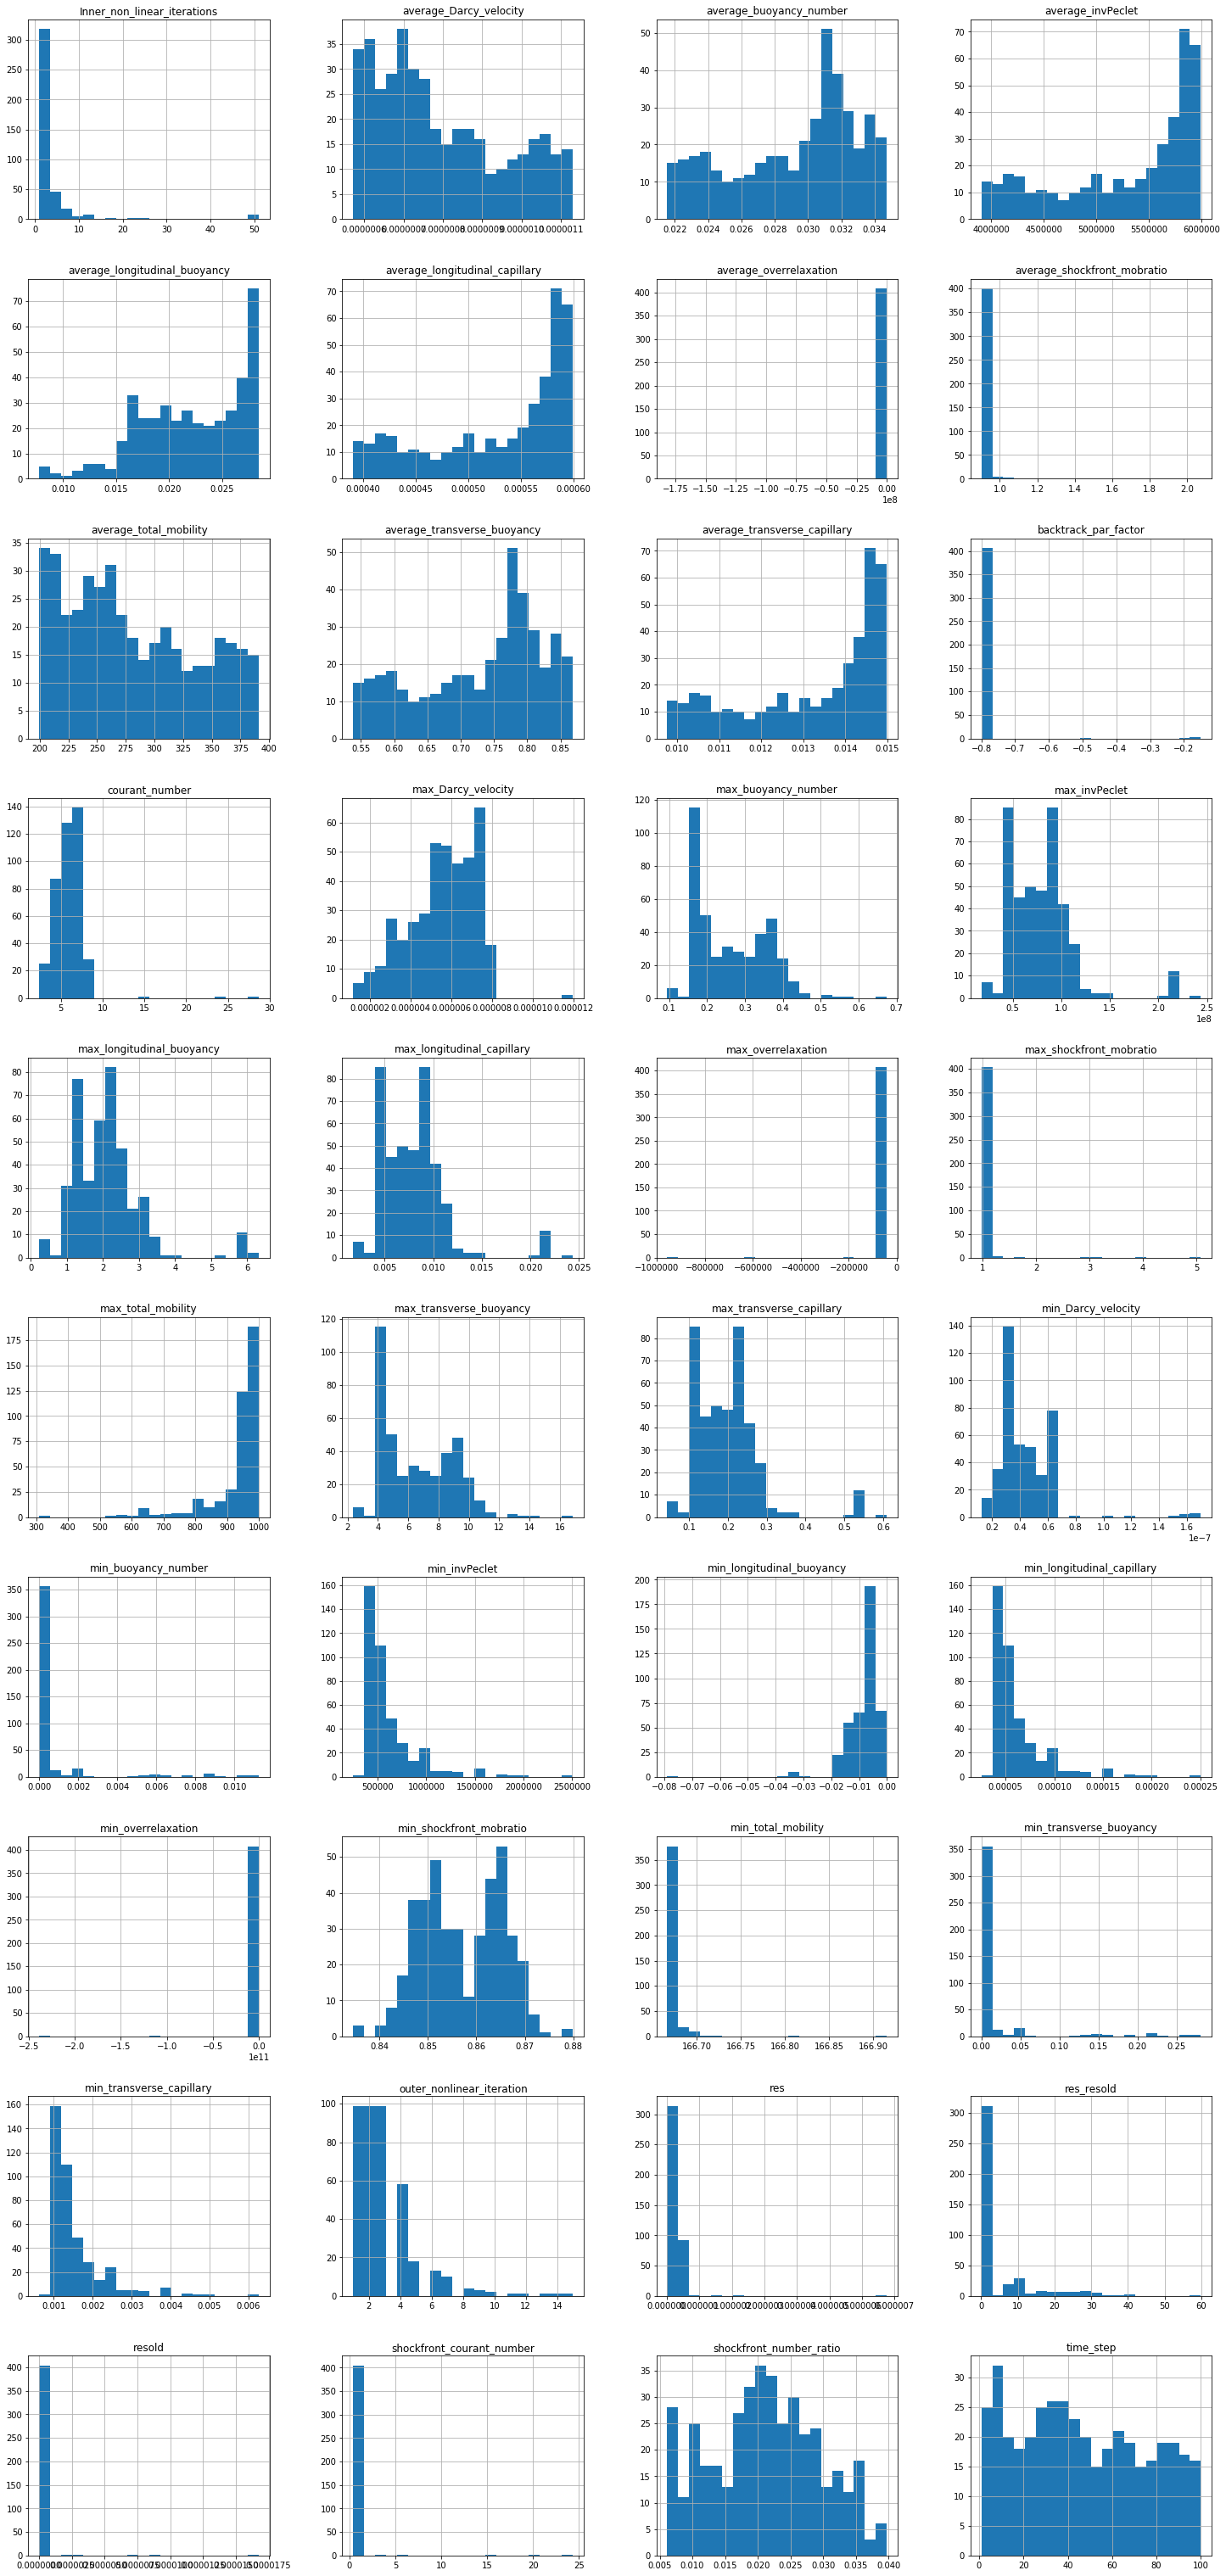

In [13]:
df.iloc[:,9:].hist(alpha=1.,figsize = (25,55), layout=(10,4), bins=20);
# norm_df.iloc[:,8:42].hist(alpha=1.,figsize = (20,30), bins=20);

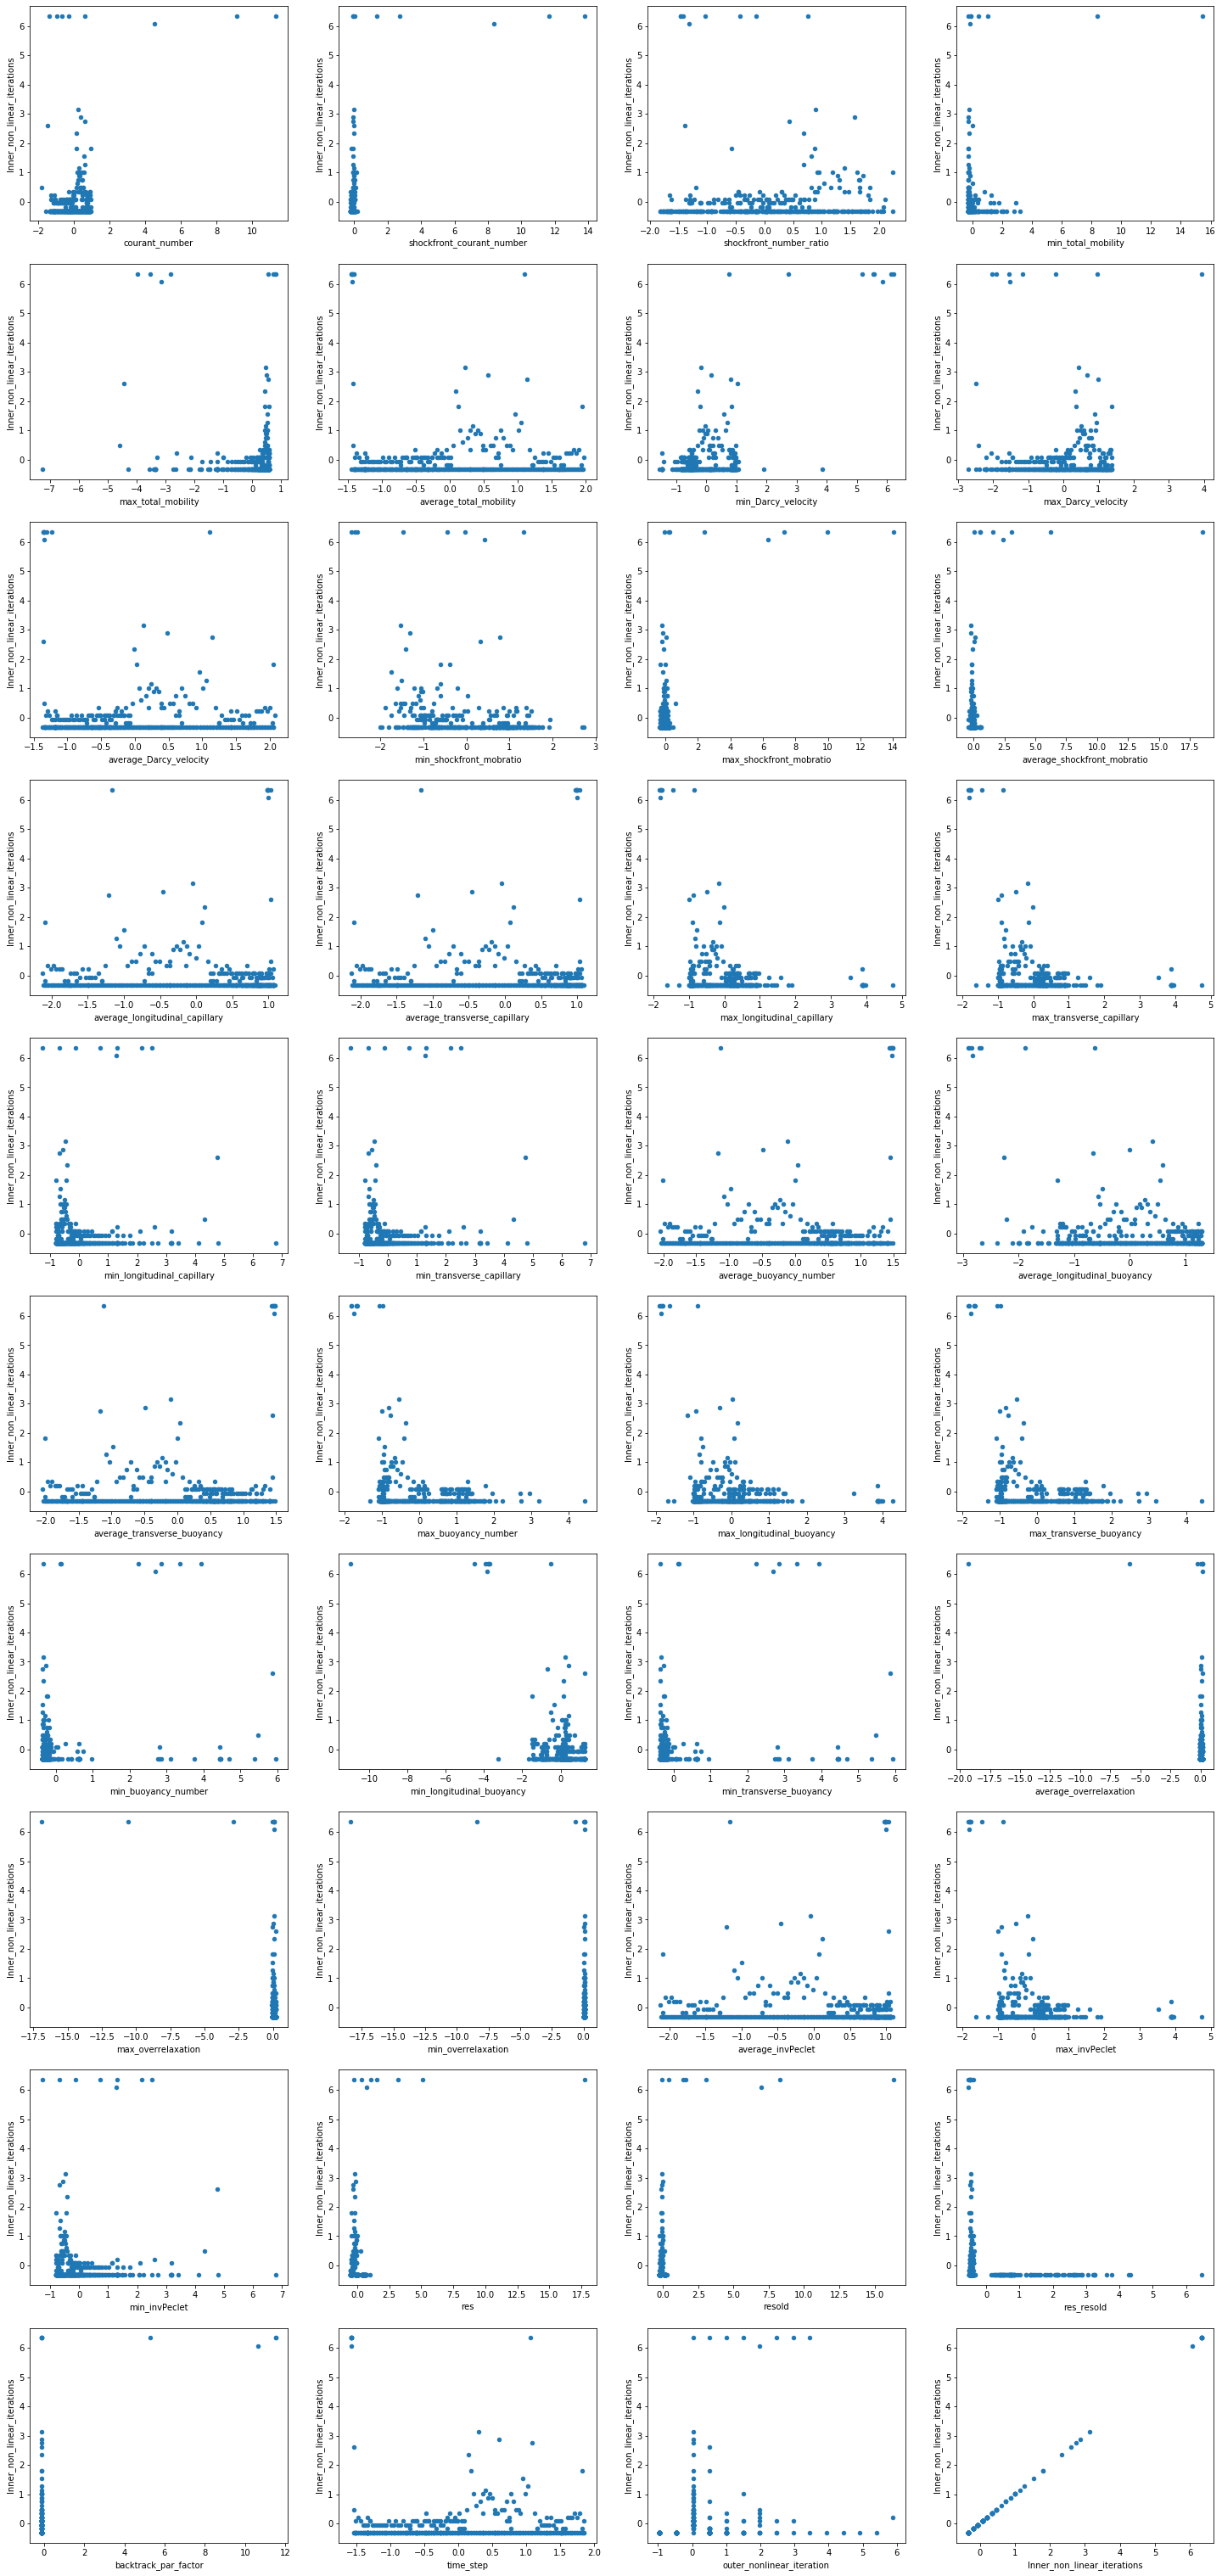

In [14]:
fig, axes = plt.subplots(10, 4, figsize=[25,55])
for i in range(0,40):
    #df.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4]);
    norm_df.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4])
#for i in range(39,40):
#    fig.delaxes(axes[i//4,i%4])

In [15]:
#pd.plotting.scatter_matrix(norm_df.iloc[:,11:42], alpha=0.8, figsize=(30, 30), diagonal='kde');

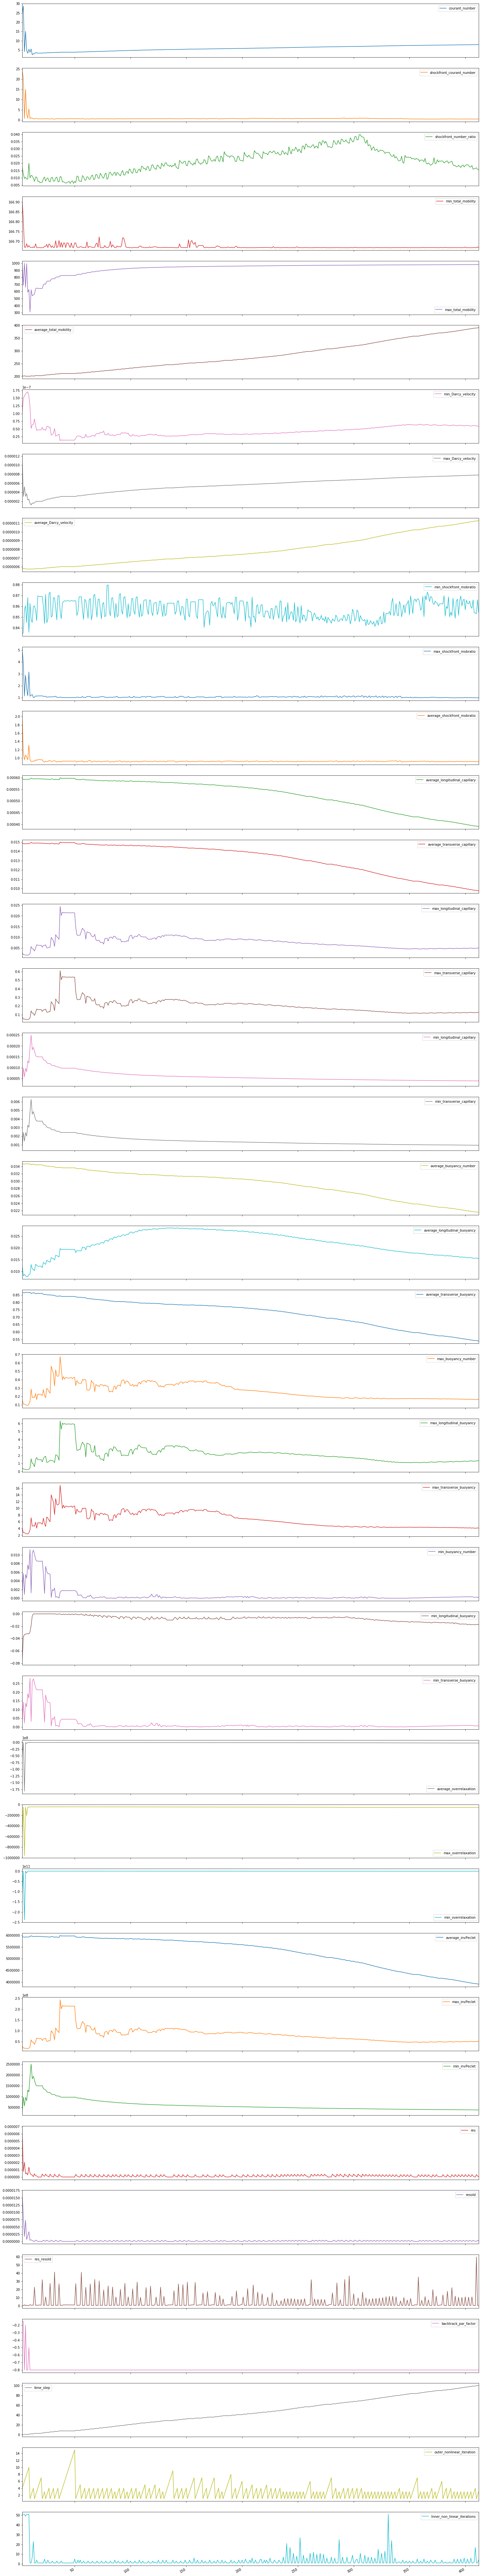

In [16]:
df.iloc[:,9:].plot(subplots=True, figsize=(25, 160));

In [17]:
df_corr_matrix = df.corr()
#df_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df_corr_matrix['Inner_non_linear_iterations']).sort_values(ascending=False)

Inner_non_linear_iterations       1.000000
max_shockfront_mobratio           0.635021
min_Darcy_velocity                0.631553
backtrack_par_factor              0.601476
resold                            0.596927
shockfront_courant_number         0.594372
min_longitudinal_buoyancy         0.559651
average_shockfront_mobratio       0.512574
max_overrelaxation                0.479293
res                               0.430847
min_overrelaxation                0.426610
average_overrelaxation            0.395986
courant_number                    0.383712
min_total_mobility                0.370167
average_longitudinal_buoyancy     0.328408
max_transverse_buoyancy           0.278208
max_buoyancy_number               0.278208
outer_nonlinear_iteration         0.276521
max_transverse_capillary          0.263665
max_longitudinal_capillary        0.263665
max_invPeclet                     0.263665
max_longitudinal_buoyancy         0.263070
min_transverse_buoyancy           0.252802
min_buoyanc

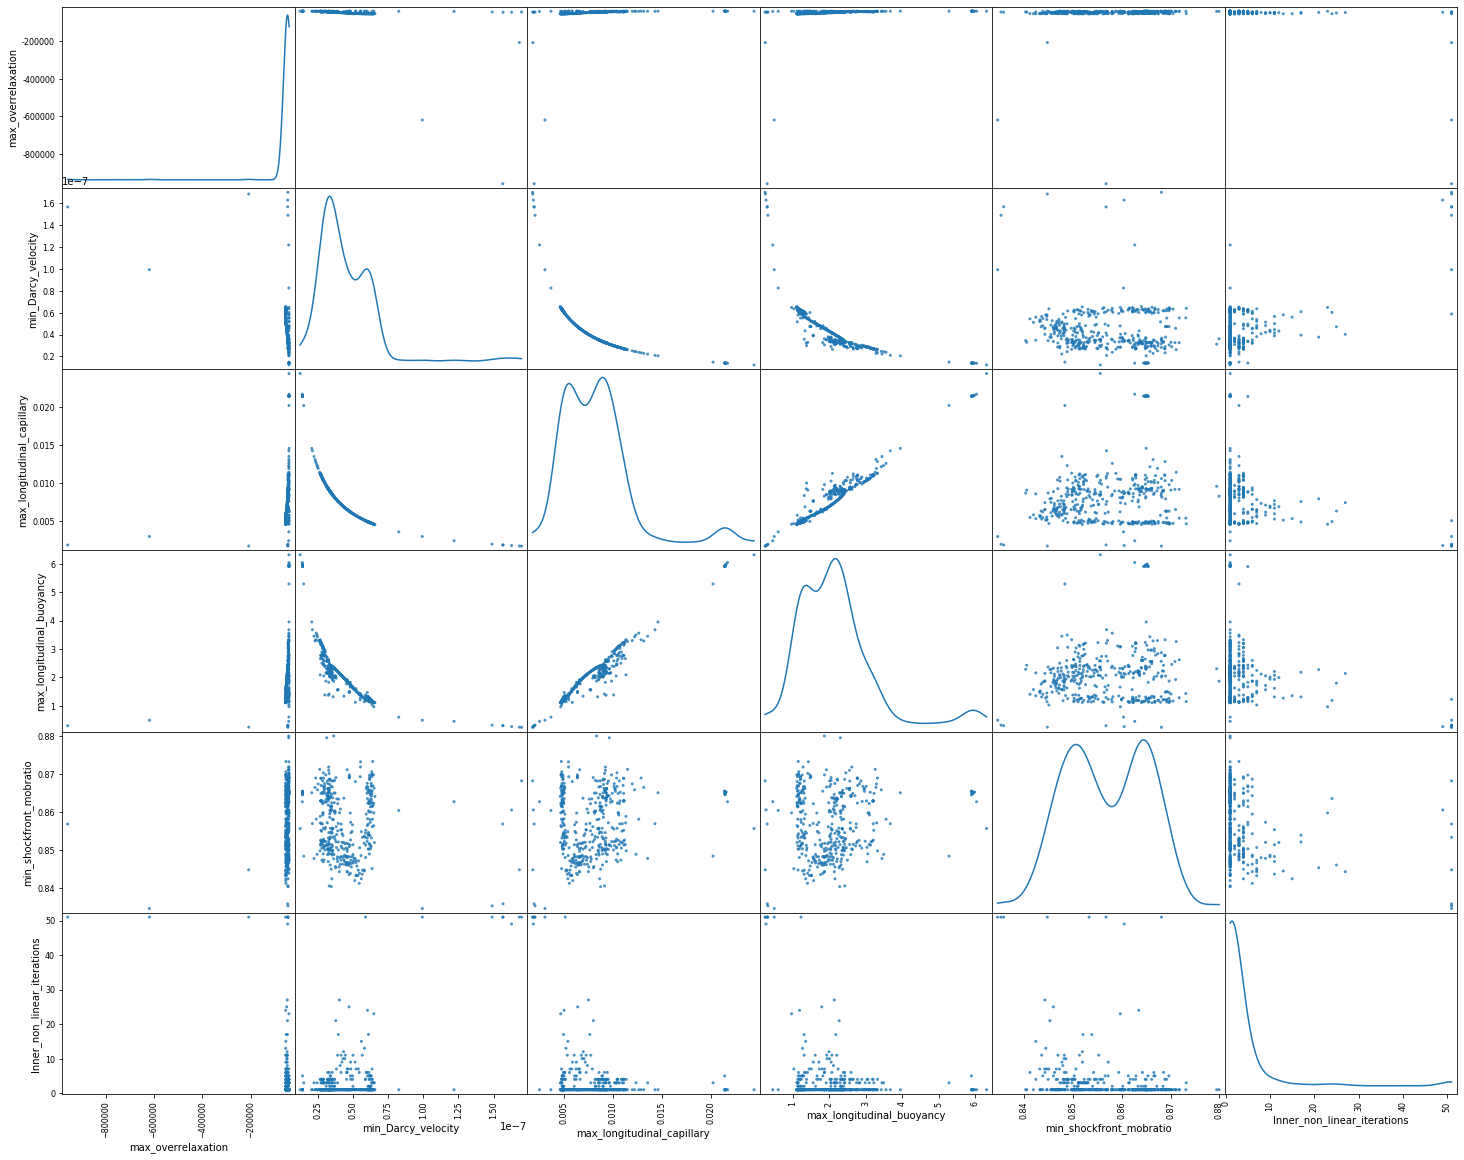

In [18]:
attributes = ['max_overrelaxation', 
              'min_Darcy_velocity', 
              'max_longitudinal_capillary', 
              'max_longitudinal_buoyancy', 
              'min_shockfront_mobratio', 
              'Inner_non_linear_iterations']
pd.plotting.scatter_matrix(df[attributes], figsize=(25,20), alpha=0.8, diagonal='kde');

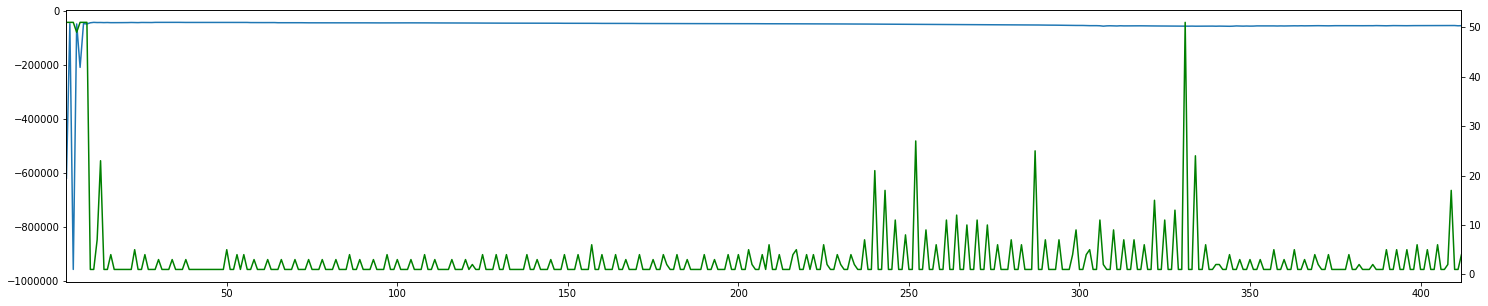

In [19]:
df['max_overrelaxation'].plot(figsize=(25, 5))
df['Inner_non_linear_iterations'].plot(secondary_y=True, style='g')

In [20]:
#df_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df_corr_matrix['res']).sort_values(ascending=False)

res                               1.000000
average_shockfront_mobratio       0.886661
resold                            0.798876
max_shockfront_mobratio           0.740979
min_total_mobility                0.699543
shockfront_courant_number         0.688779
max_overrelaxation                0.682065
backtrack_par_factor              0.608516
min_longitudinal_buoyancy         0.601503
min_overrelaxation                0.596507
average_overrelaxation            0.499002
courant_number                    0.456645
Inner_non_linear_iterations       0.430847
min_Darcy_velocity                0.345014
res_resold                        0.224720
max_longitudinal_buoyancy         0.204229
average_longitudinal_buoyancy     0.203832
max_invPeclet                     0.200733
max_longitudinal_capillary        0.200733
max_transverse_capillary          0.200733
max_transverse_buoyancy           0.180238
max_buoyancy_number               0.180238
max_Darcy_velocity                0.166688
min_shockfr

In [21]:
df2 = df[df.outer_nonlinear_iteration != 1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 412
Data columns (total 49 columns):
gravity                           311 non-null object
cap_pressure                      311 non-null object
black_oil                         311 non-null object
ov_relaxation                     311 non-null object
one_phase                         311 non-null object
wells                             311 non-null object
n_phases                          311 non-null float64
n_components                      311 non-null float64
aspect_ratio                      311 non-null float64
courant_number                    311 non-null float64
shockfront_courant_number         311 non-null float64
shockfront_number_ratio           311 non-null float64
min_total_mobility                311 non-null float64
max_total_mobility                311 non-null float64
average_total_mobility            311 non-null float64
min_Darcy_velocity                311 non-null float64
max_Darcy_velocity   

In [22]:
df2.describe()

n_phases  n_components  aspect_ratio  courant_number  \
count     311.0         311.0         311.0      311.000000   
mean        2.0           0.0           5.0        5.994908   
std         0.0           0.0           0.0        2.186179   
min         2.0           0.0           5.0        2.430349   
25%         2.0           0.0           5.0        4.880761   
50%         2.0           0.0           5.0        5.865132   
75%         2.0           0.0           5.0        6.974502   
max         2.0           0.0           5.0       28.706659   

       shockfront_courant_number  shockfront_number_ratio  min_total_mobility  \
count                 311.000000               311.000000          311.000000   
mean                    0.816633                 0.021239          166.671282   
std                     1.962859                 0.008301            0.017640   
min                     0.407197                 0.006161          166.666670   
25%                     0.533393                 0.015501          166.666730   
50%                     0.597522                 0.021264          166.667140   
75%                     0.682748                 0.027226          166.668885   
max                    24.326675                 0.039746          166.915760   

       max_total_mobility  average_total_mobility  min_Darcy_velocity  \
count          311.000000              311.000000        3.110000e+02   
mean           929.492959              278.235179        4.336120e-08   
std             82.594868               55.810416        2.169391e-08   
min            539.697750              199.795110        1.231252e-08   
25%            931.380860              231.952280        3.162573e-08   
50%            961.397910              266.162690        3.684700e-08   
75%            974.773805              320.512340        5.453733e-08   
max            999.985350              391.048480        1.699834e-07   

       max_Darcy_velocity  average_Darcy_velocity  min_shockfront_mobratio  \
count          311.000000            3.110000e+02               311.000000   
mean             0.000006            7.868924e-07                 0.856030   
std              0.000002            1.609755e-07                 0.008275   
min              0.000001            5.731832e-07                 0.834579   
25%              0.000004            6.570755e-07                 0.849668   
50%              0.000006            7.422570e-07                 0.854556   
75%              0.000007            8.990511e-07                 0.864082   
max              0.000012            1.130801e-06                 0.879439   

       max_shockfront_mobratio  average_shockfront_mobratio  \
count               311.000000                   311.000000   
mean                  1.080397                     0.927278   
std                   0.327351                     0.071189   
min                   0.975139                     0.901234   
25%                   1.010153                     0.915792   
50%                   1.035726                     0.919716   
75%                   1.072163                     0.925497   
max                   5.086247                     2.073816   

       average_longitudinal_capillary  average_transverse_capillary  \
count                      311.000000                    311.000000   
mean                         0.000531                      0.013286   
std                          0.000065                      0.001614   
min                          0.000391                      0.009767   
25%                          0.000486                      0.012140   
50%                          0.000560                      0.014009   
75%                          0.000585                      0.014632   
max                          0.000600                      0.014990   

       max_longitudinal_capillary  max_transverse_capillary  \
count                  311.000000                311.000000   
mean          

In [23]:
norm_df2 = df2.copy()
column_names_to_normalize = df2.columns.values[9:]
X = df2[column_names_to_normalize].values
X_scaled = preprocessing.scale(X)
norm_df2[column_names_to_normalize] = X_scaled
norm_df2

/home/viluiz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
6         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
407       T            T         F             T         F     F       2.0   
408       T            T         F             T         F     F       2.0   
409       T            T         F             T         F     F       2.0   
411       T            T         F             T         F     F       2.0   
412       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0        8.398816                  11.996752   
4             0.0           5.0       10.405533                  10.147581   
5             0.0           5.0       -0.873656                  -0.093243   
6             0.0           5.0        4.149472                   7.263949   
7             0.0           5.0       -0.582107                   1.144305   
..            ...           ...             ...                        ...   
407           0.0           5.0        0.858566                  -0.197335   
408           0.0           5.0        0.867402                  -0.198852   
409           0.0           5.0        0.869434                  -0.198354   
411           0.0           5.0        0.870228                  -0.198913   
412           0.0           5.0        0.879150                  -0.194448   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                  -0.428597           13.881959            0.845748   
4                  -1.028047            7.544514           -2.924131   
5                  -1.411695           -0.090968            0.854847   
6                  -1.315783           -0.176141           -3.254845   
7                  -1.459651            0.904421            0.786647   
..                       ...                 ...                 ...   
407                -0.644399           -0.261882            0.628106   
408                -0.596443           -0.213617            0.628607   
409                -0.572465           -0.248254            0.628713   
411                -0.644399           -0.030779            0.630013   
412                -0.692355           -0.217024            0.630508   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 -1.365110            2.582478            3.944108   
4                 -1.397599            4.877355           -1.501528   
5                 -1.373557            5.230018           -0.173825   
6                 -1.400160            5.519174           -1.473296   
7                 -1.403121            5.774287           -1.107802   
..                      ...                 ...                 ...   
407                1.970989            0.815785            1.386117   
408                1.987212            0.805567            1.390463   
409                1.990699            0.811793            1.390698   
411                2.008520            0.742092            1.402122   
412                2.024624            0.712464            1.406516   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3                 -1.202151                -2.596658                12.256890   
4                 -1.307010                -2.512985                 8.717906   
5                 -1.267806                 0.091153                 0.148044   
6                 -1.316663                 0.539387                 5.526278   
7      

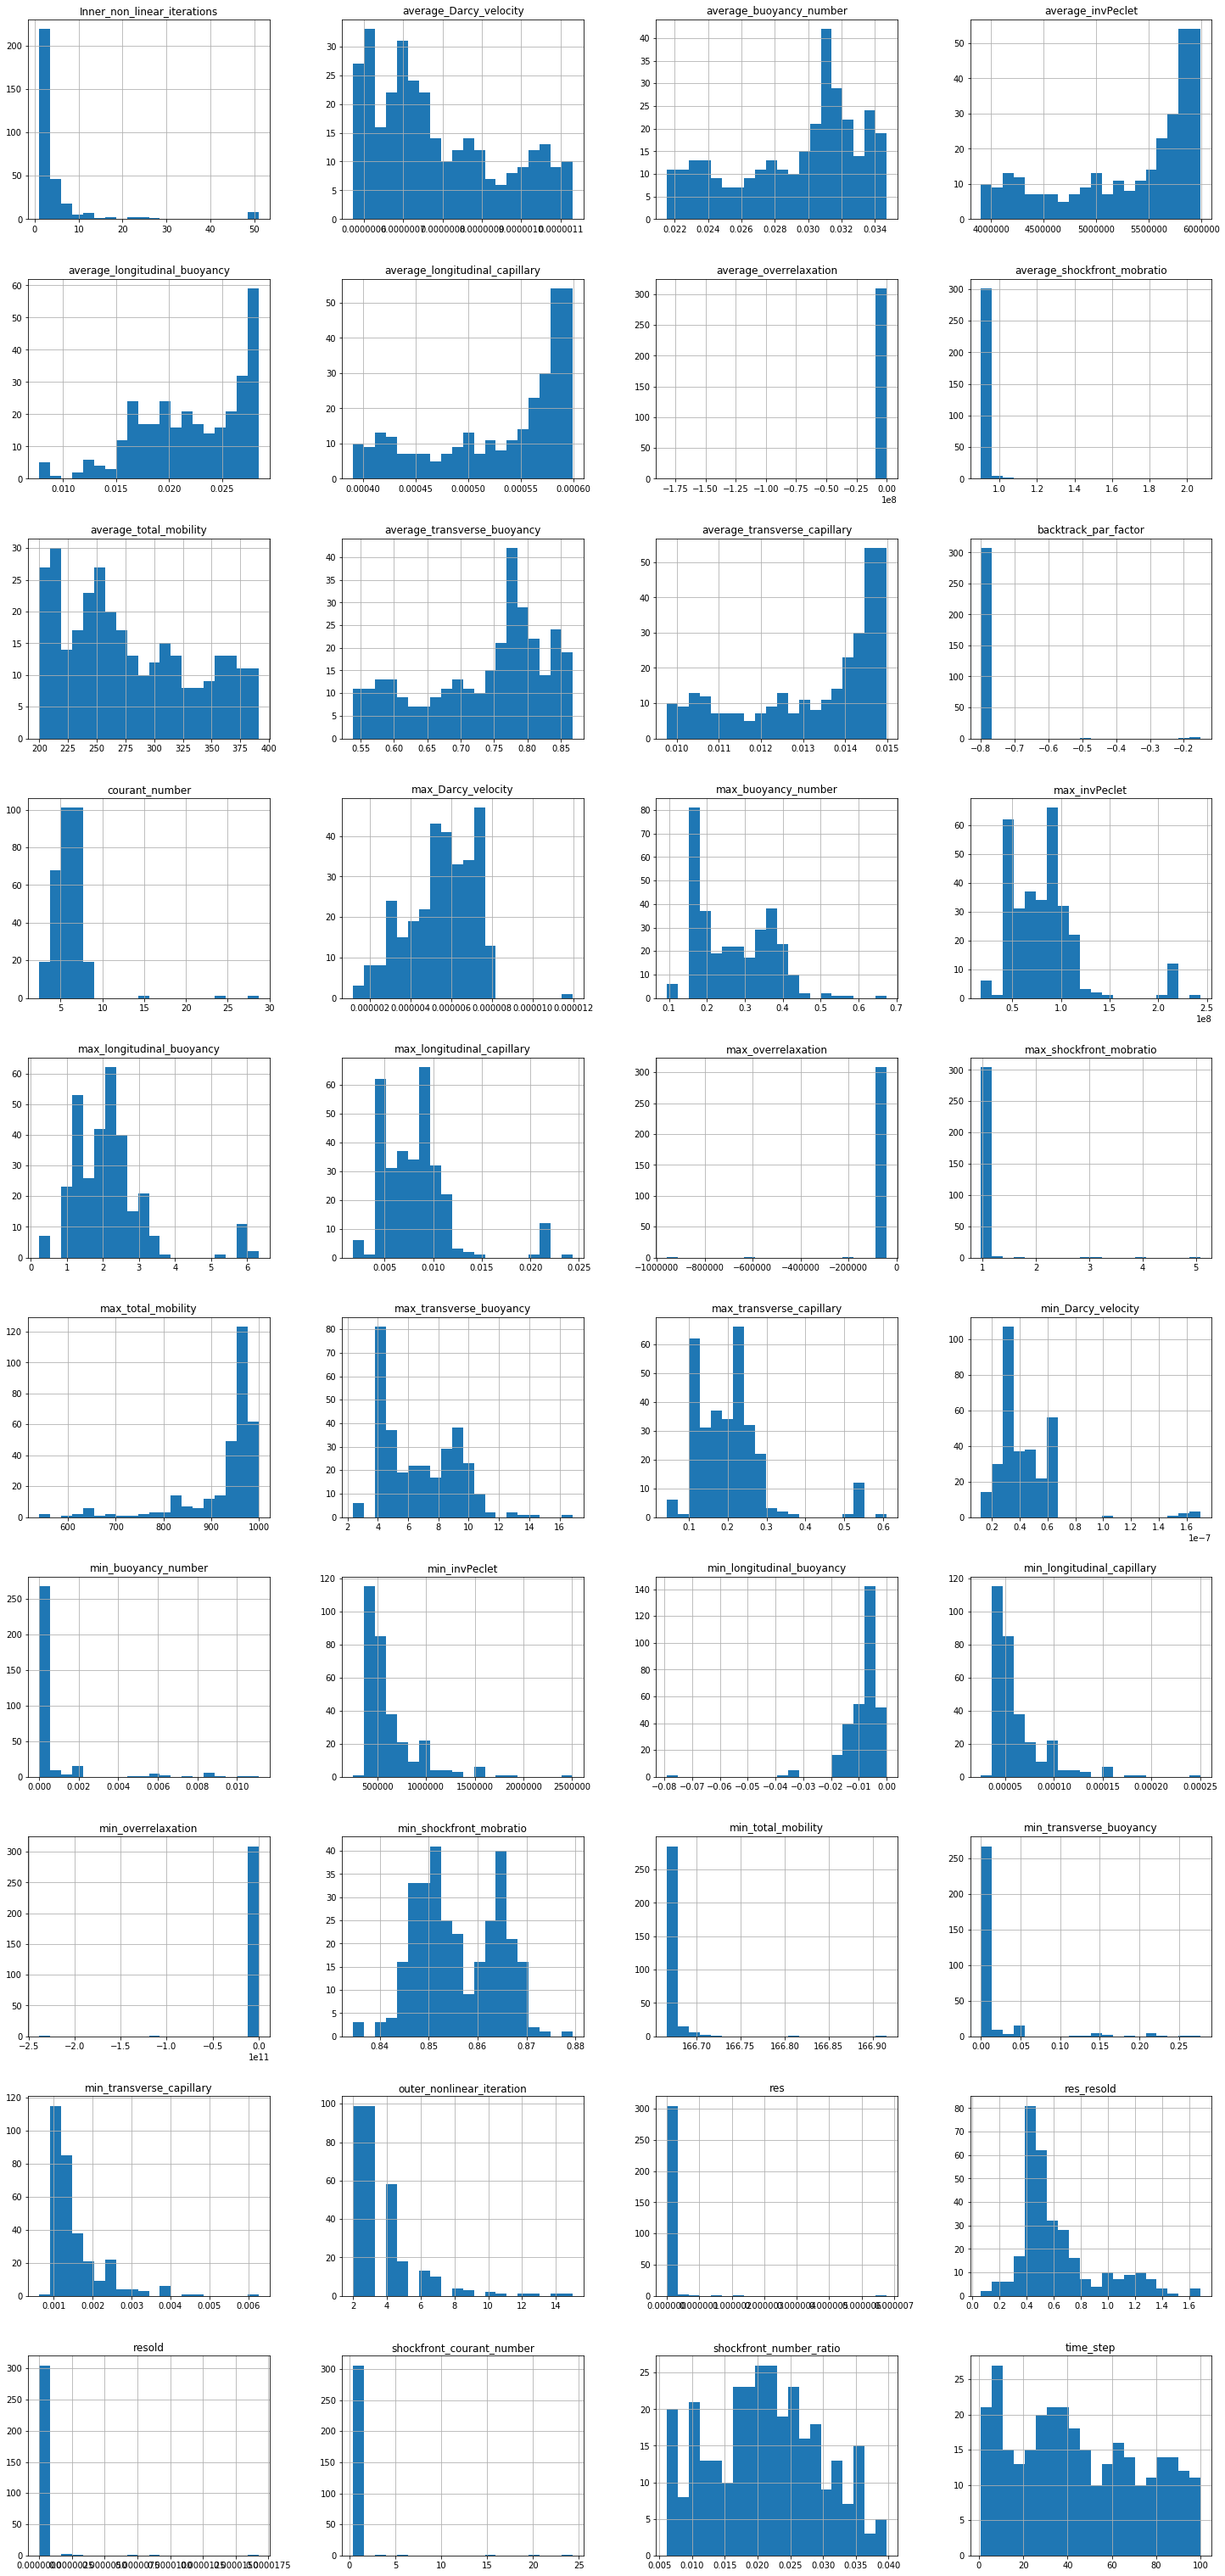

In [24]:
df2.iloc[:,9:].hist(alpha=1.,figsize = (25,55), layout=(10,4), bins=20);
# norm_df.iloc[:,8:42].hist(alpha=1.,figsize = (20,30), bins=20);

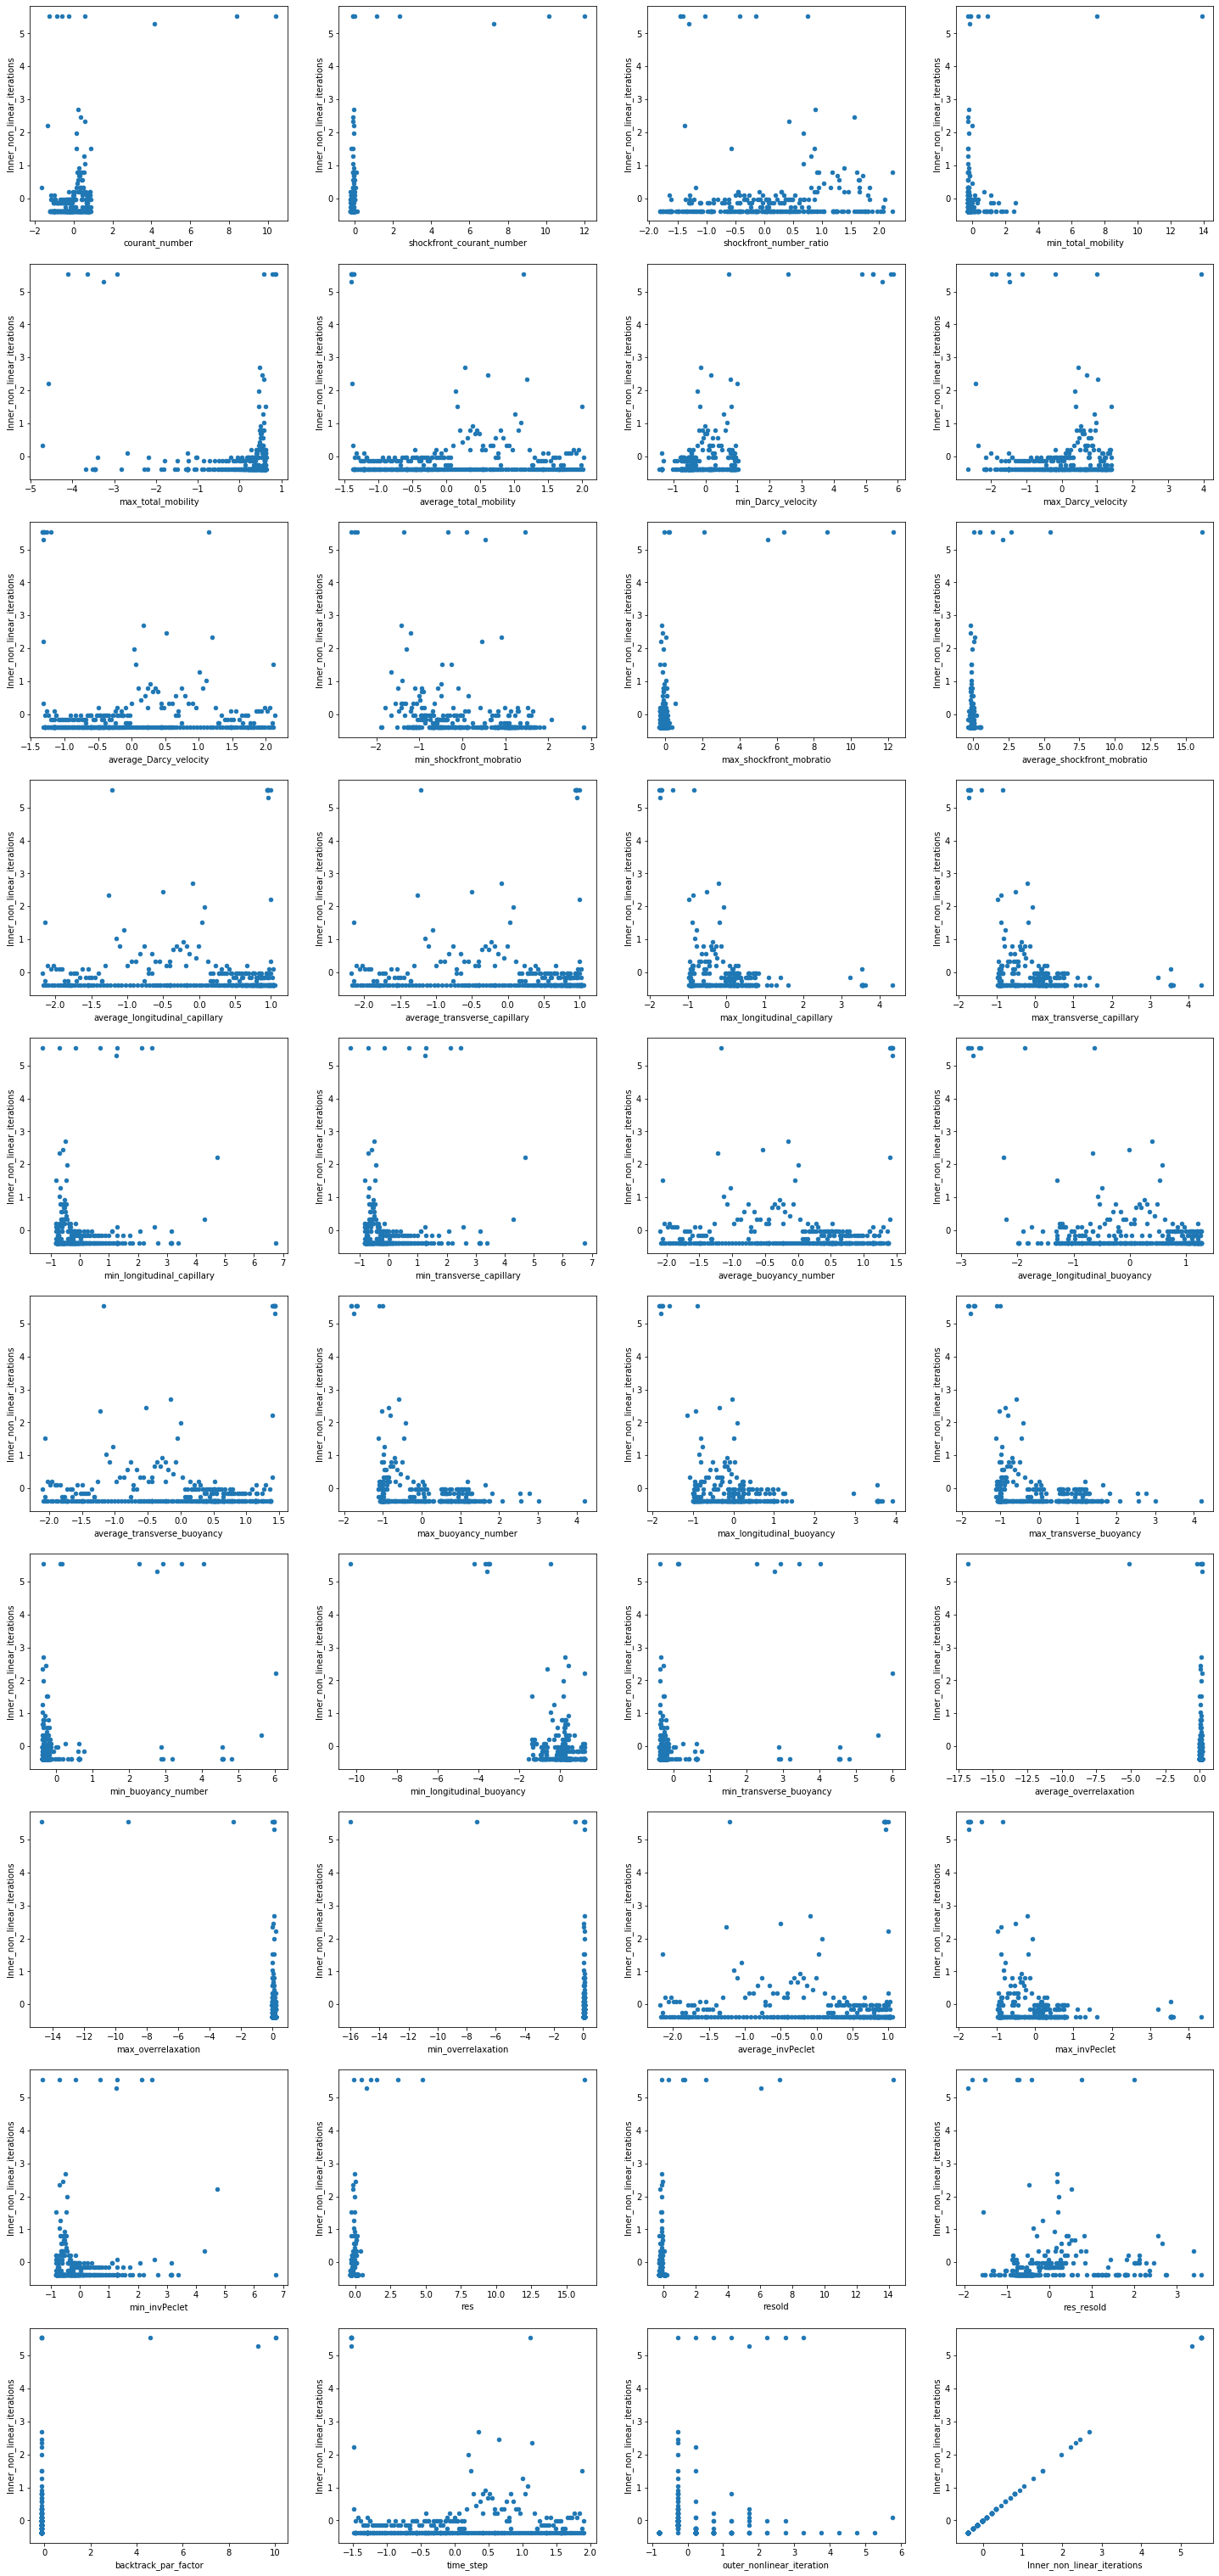

In [25]:
fig, axes = plt.subplots(10, 4, figsize=[25,55])
for i in range(0,40):
    #df2.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4]);
    norm_df2.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4])
#for i in range(39,40):
#    fig.delaxes(axes[i//4,i%4])

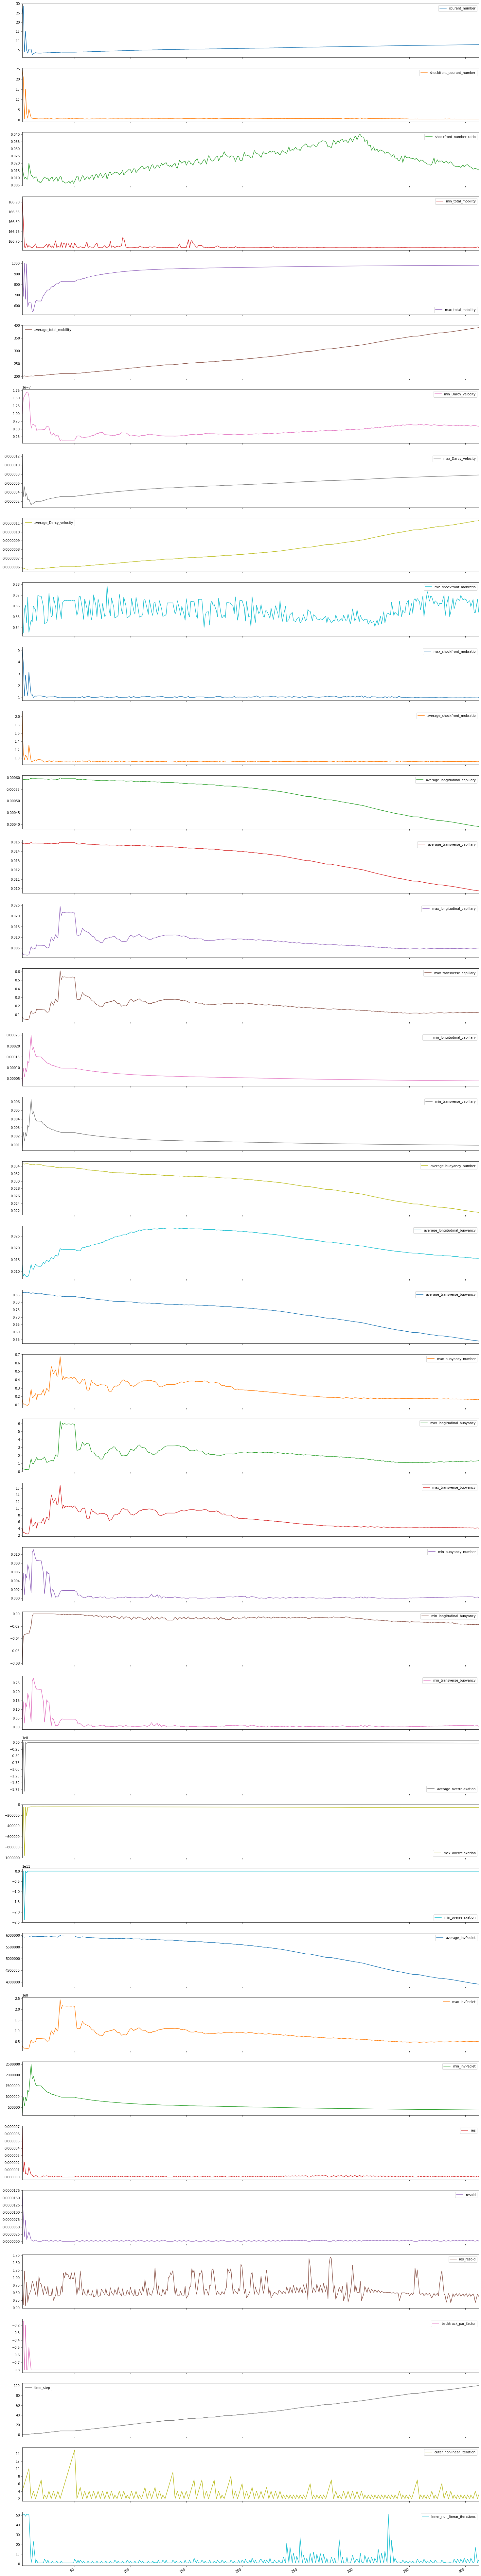

In [26]:
df2.iloc[:,9:].plot(subplots=True, figsize=(25, 160));

In [27]:
df2_corr_matrix = df2.corr()
#df2_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df2_corr_matrix['Inner_non_linear_iterations']).sort_values(ascending=False)

Inner_non_linear_iterations       1.000000
min_Darcy_velocity                0.699866
max_shockfront_mobratio           0.641702
min_longitudinal_buoyancy         0.608868
backtrack_par_factor              0.602548
shockfront_courant_number         0.595516
resold                            0.589115
average_shockfront_mobratio       0.519124
res                               0.509564
max_overrelaxation                0.481552
min_overrelaxation                0.427254
courant_number                    0.414302
average_overrelaxation            0.397371
average_longitudinal_buoyancy     0.382316
min_total_mobility                0.381149
max_transverse_buoyancy           0.336181
max_buoyancy_number               0.336181
max_transverse_capillary          0.308748
max_invPeclet                     0.308748
max_longitudinal_capillary        0.308748
max_longitudinal_buoyancy         0.307368
min_buoyancy_number               0.301591
min_transverse_buoyancy           0.301591
min_shockfr

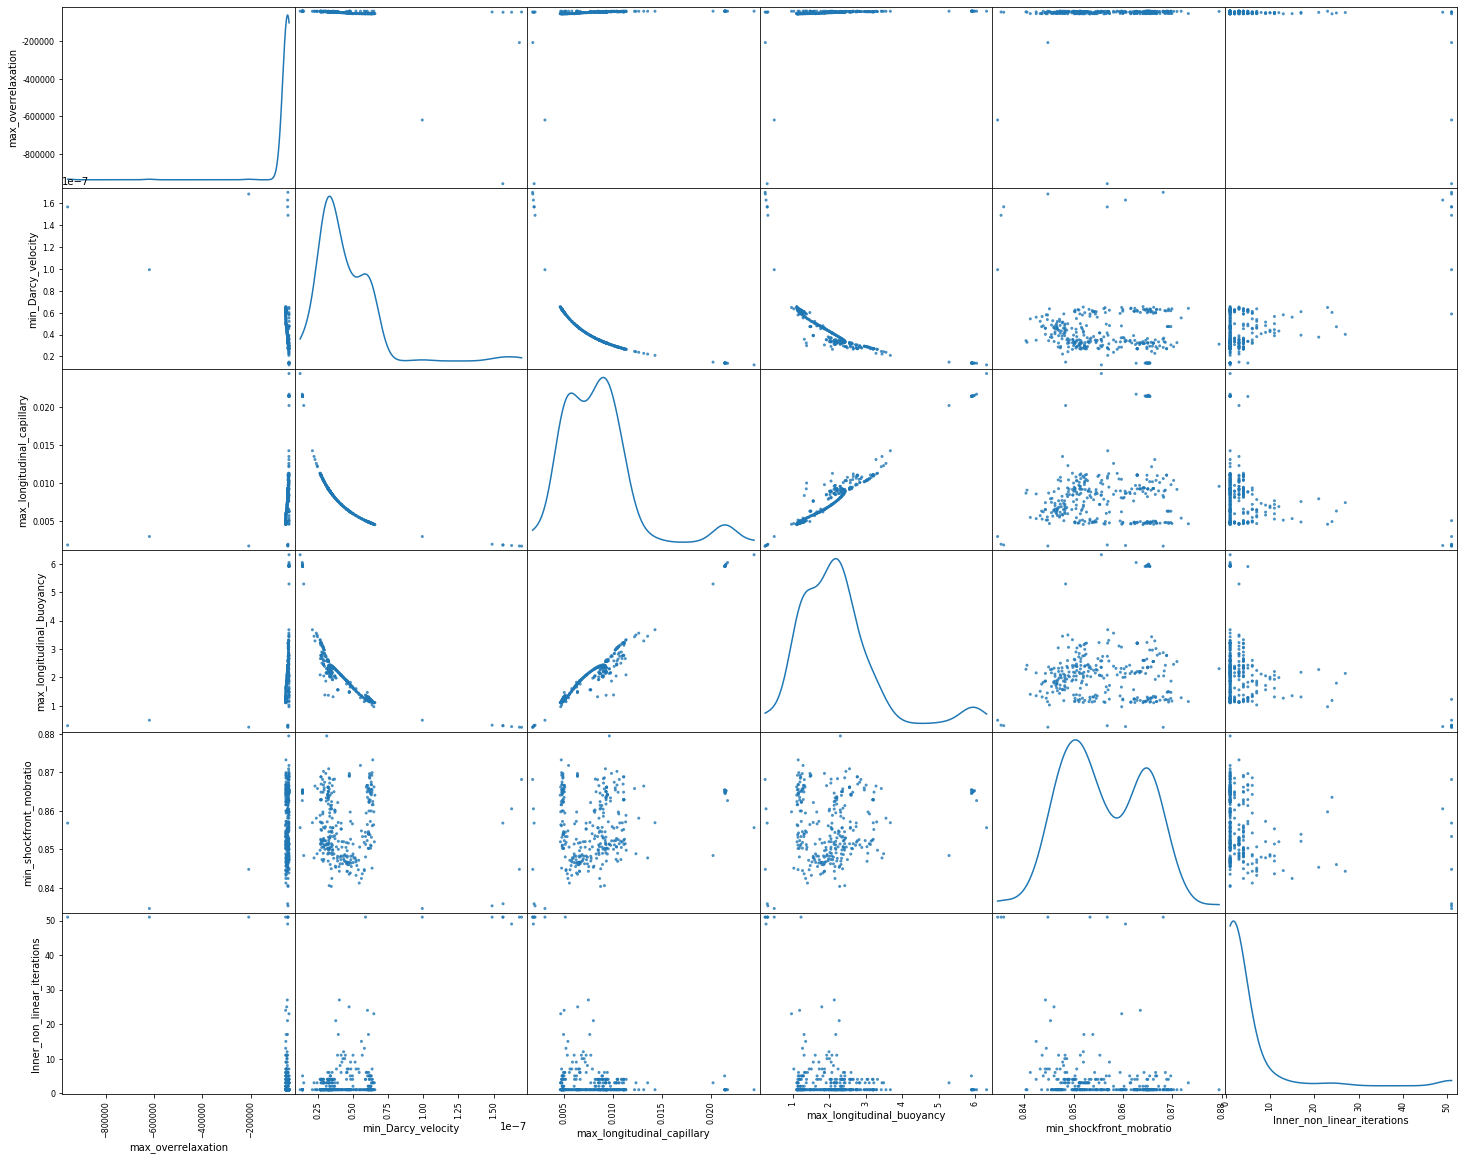

In [28]:
attributes = ['max_overrelaxation', 
              'min_Darcy_velocity', 
              'max_longitudinal_capillary', 
              'max_longitudinal_buoyancy', 
              'min_shockfront_mobratio', 
              'Inner_non_linear_iterations']
pd.plotting.scatter_matrix(df2[attributes], figsize=(25,20), alpha=0.8, diagonal='kde');

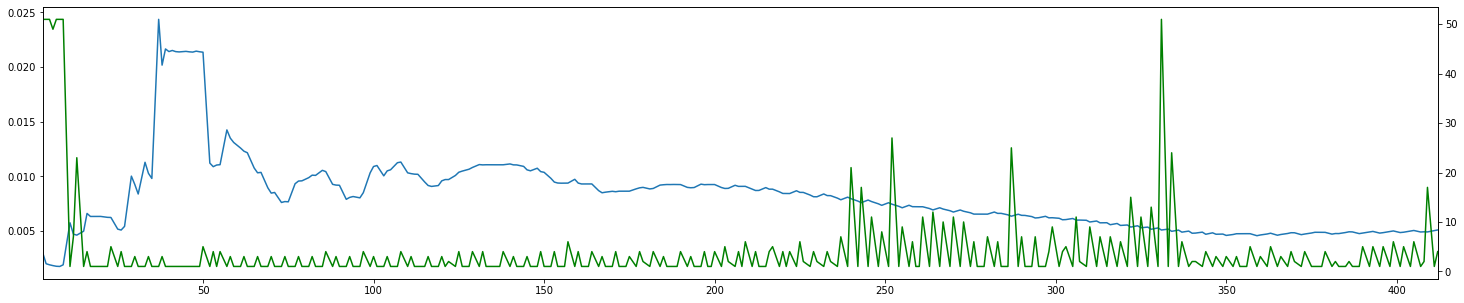

In [29]:
df2['max_longitudinal_capillary'].plot(figsize=(25, 5))
df2['Inner_non_linear_iterations'].plot(secondary_y=True, style='g')

In [30]:
df2_corr_matrix = df2.corr()
#df2_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df2_corr_matrix['res']).sort_values(ascending=False)

res                               1.000000
average_shockfront_mobratio       0.929166
resold                            0.873005
max_shockfront_mobratio           0.784090
min_total_mobility                0.766718
shockfront_courant_number         0.734340
max_overrelaxation                0.722317
min_longitudinal_buoyancy         0.682266
backtrack_par_factor              0.650381
min_overrelaxation                0.632575
average_overrelaxation            0.529584
Inner_non_linear_iterations       0.509564
courant_number                    0.504450
min_Darcy_velocity                0.368640
min_shockfront_mobratio           0.261241
average_longitudinal_buoyancy     0.226903
max_longitudinal_buoyancy         0.191527
max_Darcy_velocity                0.187498
max_transverse_capillary          0.183277
max_longitudinal_capillary        0.183277
max_invPeclet                     0.183277
max_transverse_buoyancy           0.164663
max_buoyancy_number               0.164663
time_step  